In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Solar City: SCTY
Vivint Solar: VSLR
Sunrun: RUN
Tesla: TSLA

In [69]:
from pandas_datareader import data as wb
import datetime as dt

In [70]:
company = 'RUN'
start = '2010-01-01'
end = '2017-12-31'
stocks = wb.DataReader(company, data_source='google', start=start, end=end)
stocks.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-05,13.06,13.31,10.40,10.77,14096975
2015-08-06,11.00,11.20,8.23,8.77,3570430
2015-08-07,9.19,10.20,8.77,10.14,1624299
2015-08-10,10.73,10.73,10.00,10.12,435917
2015-08-11,10.00,10.03,9.50,9.79,349732


In [71]:
stocks = ['VSLR', 'RUN','TSLA']
mydata = pd.DataFrame()
for stock in stocks:
    mydata[stock] = wb.DataReader(stock, 'google', start='2016-1-1')['Close']

In [72]:
mydata.head()

,VSLR,RUN,TSLA
Date,,,
2016-01-04,9.92,11.21,223.41
2016-01-05,10.07,9.61,223.43
2016-01-06,10.07,10.20,219.04
2016-01-07,9.41,9.21,215.65
2016-01-08,9.60,9.75,211.00


In [73]:
mydata.iloc[0]

VSLR      9.92
RUN      11.21
TSLA    223.41
Name: 2016-01-04 00:00:00, dtype: float64

## Nominalization

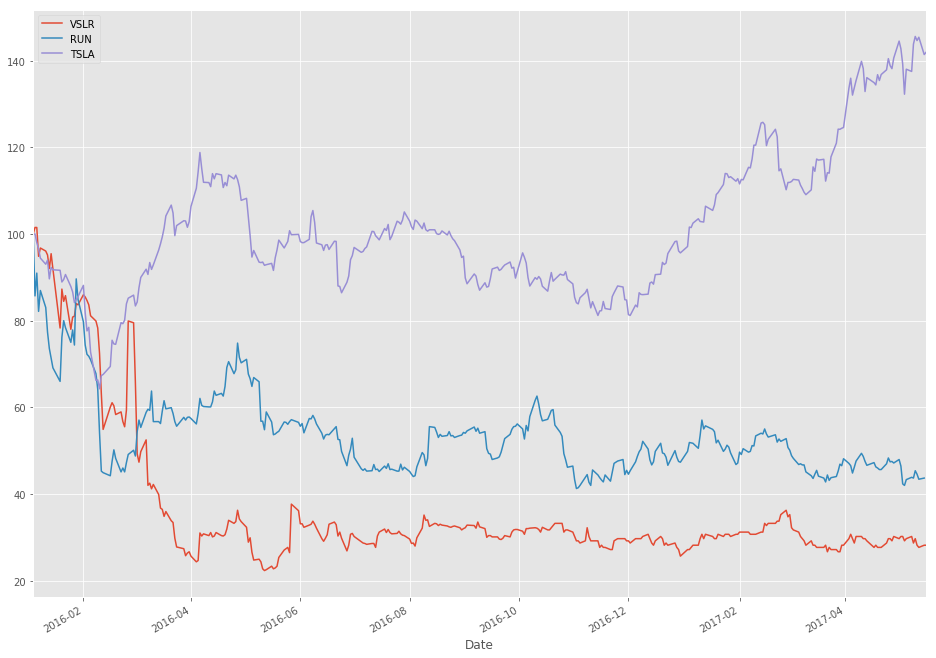

In [74]:
(mydata/mydata.iloc[0]*100).plot(figsize=(16,12))

### Return on a portfolio

In [75]:

returns16 = (mydata/mydata.shift(1))-1
returns16.head()

,VSLR,RUN,TSLA
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.015121,-0.142730,0.000090
2016-01-06,0.000000,0.061394,-0.019648
2016-01-07,-0.065541,-0.097059,-0.015477
2016-01-08,0.020191,0.058632,-0.021563


### create weights

In [76]:
weights = np.array([0.333, 0.333, 0.333])


In [78]:
np.dot(returns16,weights)

array([             nan,  -4.24638991e-02,   1.39014742e-02,
        -5.92995279e-02,   1.90677433e-02,  -2.24271443e-02,
        -2.26398325e-02,  -4.23870578e-02,   1.20683916e-02,
        -2.46354976e-02,  -6.47700796e-02,   7.96506532e-02,
         8.12861977e-03,   2.77994133e-03,  -5.46700568e-02,
         1.99352903e-02,  -2.34908430e-02,   8.31742787e-02,
        -1.61273688e-02,  -1.06313776e-03,  -4.82436513e-02,
        -2.96675631e-02,  -2.46871146e-03,  -3.79308809e-02,
        -4.99451254e-02,  -2.36600657e-02,  -8.74072651e-02,
        -8.11594276e-02,  -4.49108390e-02,   3.49812224e-02,
         5.94208851e-02,   1.11257989e-02,  -2.45103491e-02,
         4.21661995e-03,  -6.93501651e-03,  -1.01875429e-02,
         5.44426093e-02,   1.33698895e-01,   7.74992195e-03,
        -7.63905353e-02,  -4.13411159e-02,   1.65221835e-02,
         1.61348704e-02,   4.61530922e-02,  -6.67992424e-02,
         1.25563293e-02,   9.13144656e-03,  -2.48859184e-02,
        -6.00236881e-03,

### Annual returns

In [79]:
annual_returns = returns16.mean()*250
annual_returns

VSLR   -0.582461
RUN    -0.395367
TSLA    0.324107
dtype: float64

In [80]:
np.dot(annual_returns,weights)

-0.21768899811804537

In [81]:
portfolio_solar = str(round(np.dot(annual_returns, weights),5)*100)+'%'

In [82]:
portfolio_solar

'-21.769%'

### Risk
- variance

In [86]:
tsla_sReturn = (TSLA / TSLA.shift(1))-1

### Variance

In [87]:
tsla_sReturn.var()

0.0005569385709848963

### Variance annualized

In [88]:
tsla_sReturn.var()*250

0.13923464274622407

### Risk

In [90]:
run_return = (RUN / RUN.shift(1))-1


### Variance annualized

In [91]:
run_return.var()*250

0.4149285904942343

### Portfolio 

In [95]:
returns16.cov()

,VSLR,RUN,TSLA
VSLR,0.002810,0.000603,0.000184
RUN,0.000603,0.001660,0.000187
TSLA,0.000184,0.000187,0.000555


In [96]:
returns16.cov()*250

,VSLR,RUN,TSLA
VSLR,0.702511,0.150639,0.045960
RUN,0.150639,0.414929,0.046668
TSLA,0.045960,0.046668,0.138833


In [97]:
returns16.corr()

,VSLR,RUN,TSLA
VSLR,1.000000,0.278606,0.147167
RUN,0.278606,1.000000,0.194158
TSLA,0.147167,0.194158,1.000000


### Equal weighting: *W* = weights
- weights must equal 1, but the weight does not have to be equally distributed

In [ ]:
weights = np.arrays([0.333, 0.333, 0.333])

### Portfolio Covariance

In [106]:
port_annual_cav = returns16.cov()*250

In [107]:
port_var = np.dot(weights.T, np.dot(port_annual_cav, weights))

In [108]:
port_var

0.19325796720366831

### Port Volatility

In [109]:
port_vol = np.dot(weights.T, np.dot(port_annual_cav, weights))**0.5
port_vol


0.43961115454873106

In [112]:

print(str(round(port_vol,5)*100)+'%')

43.961%
